# Estadística Aplicada
## Alejandro Hernández Cerda 1903855
### 11va Sesión 6 Marzo 2023

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from lifelines import CoxPHFitter
from lifelines.datasets import load_rossi
rossi = load_rossi()

In [4]:
rossi

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3
...,...,...,...,...,...,...,...,...,...
427,52,0,1,31,0,1,0,1,3
428,52,0,0,20,1,0,0,1,1
429,52,0,1,20,1,1,1,1,1
430,52,0,0,29,1,1,0,1,3


### Información

week : Tiempo de supervivencia en semanas\
arrest : 1 si fue arrestado,0 si no.\
age: edad cuando fue liberad0.\
race: 1 negro, 0 otra raza.\
wexp: 1 trabajo de tiempo completo cuando fue arrestado, 0 si no.\
mar: 1 si estas casado al momento de la liberacion, 0 si no.\
paro: 1 libertad condicional, 0 si no.\
prio: encarcelamientos anteriores.

In [5]:
rossi.describe()

,week,arrest,fin,age,race,wexp,mar,paro,prio
count,432.000000,432.000000,432.00000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000
mean,45.854167,0.263889,0.50000,24.597222,0.877315,0.571759,0.122685,0.618056,2.983796
std,12.662293,0.441251,0.50058,6.113375,0.328456,0.495398,0.328456,0.486426,2.896068
min,1.000000,0.000000,0.00000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,0.000000,0.00000,20.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,52.000000,0.000000,0.50000,23.000000,1.000000,1.000000,0.000000,1.000000,2.000000
75%,52.000000,1.000000,1.00000,27.000000,1.000000,1.000000,0.000000,1.000000,4.000000
max,52.000000,1.000000,1.00000,44.000000,1.000000,1.000000,1.000000,1.000000,18.000000


In [10]:
rossi.groupby('arrest').describe()

week                                                        fin  \
        count       mean        std   min   25%   50%   75%   max  count   
arrest                                                                     
0       318.0  52.000000   0.000000  52.0  52.0  52.0  52.0  52.0  318.0   
1       114.0  28.710526  14.447784   1.0  17.0  28.0  41.5  52.0  114.0   

                  ... paro        prio                                     \
            mean  ...  75%  max  count      mean       std  min  25%  50%   
arrest            ...                                                       
0       0.528302  ...  1.0  1.0  318.0  2.701258  2.552057  0.0  1.0  2.0   
1       0.421053  ...  1.0  1.0  114.0  3.771930  3.587182  0.0  1.0  3.0   

                   
        75%   max  
arrest             
0       3.0  15.0  
1       5.0  18.0  

[2 rows x 64 columns]

In [11]:
rossi.groupby('arrest')['week'].describe()

,count,mean,std,min,25%,50%,75%,max
arrest,,,,,,,,
0,318.0,52.000000,0.000000,52.0,52.0,52.0,52.0,52.0
1,114.0,28.710526,14.447784,1.0,17.0,28.0,41.5,52.0


In [12]:
rossi.groupby('arrest')['mar'].describe()

,count,mean,std,min,25%,50%,75%,max
arrest,,,,,,,,
0,318.0,0.141509,0.349096,0.0,0.0,0.0,0.0,1.0
1,114.0,0.070175,0.256570,0.0,0.0,0.0,0.0,1.0


### Hipótesis
fin: si recibe ayuda financiera, en teoria no hay necesidad de robar. Por lo tanto, la probabilidad de ser arrestado se reduce.\
age: Al ser más joven, los jovenes tienen más riesgo de ser arrestados debido a que son más descuidados.\
race: Si la persona es negra tiene más probabilidad de ser arrestado (racismo)\
wexp: Menos probable de trabajar de nuevo.\
mar: Si está casado, menos probable.\
paro: No, se esforzó en salir y no regresará tan facil.\
prio: Si, debido a que entrev más edad, menos cambian los habitos.

In [16]:
cph = CoxPHFitter()
cph.fit(rossi, duration_col='week',event_col='arrest')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
             duration col = 'week'
                event col = 'arrest'
      baseline estimation = breslow
   number of observations = 432
number of events observed = 114
   partial log-likelihood = -658.75
         time fit was run = 2023-03-06 21:55:31 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
fin        -0.38       0.68       0.19            -0.75            -0.00                 0.47                 1.00
age        -0.06       0.94       0.02            -0.10            -0.01                 0.90                 0.99
race        0.31       1.37       0.31            -0.29             0.92                 0.75                 2.50
wexp       -0.15       0.86       0.21            -0.57             0.27                 0.57                 1.30
mar        -0.43       0.65       0.38            -1.18             0.31                 0.31                 1.37
paro       -0.08       0.92       0.20            -0.47             0.30                 0.63                 1.35
prio        0.09       1.10       0.03             0.04             0.15                 1.04                 1.16

            cmp to     z      p   -log2(p)
covariate                                 
fin           0.00 -1.98   0.05       4.40
age           0.00 -2.61   0.01       6.79
race          0.00  1.02   0.31       1.70
wexp          0.00 -0.71   0.48       1.06
mar           0.00 -1.14   0.26       1.97
paro          0.00 -0.43   0.66       0.59
prio          0.00  3.19 <0.005       9.48
---
Concordance = 0.64
Partial AIC = 1331.50
log-likelihood ratio test = 33.27 on 7 df
-log2(p) of ll-ratio test = 15.37

$H_o : B_i=0\\ 
H_o : B_i\neq 0$

Si $p<\alpha$ Rechazamos $H_o$

Del coeficiente solo vamos a tomar el signo para ver si incrementa o decrementa el riesgo\
**Edad**\
Si (-) 1-.094 = .06$\Leftarrow$*Age\
Por cada año de edad el riesgo de ser arrestado disminuye en 6%\
Si (+) al exp(coef) le restamos uno = exp(coef)-1 = 1.37 - 1 = .37 $\Leftarrow$ Race*



<AxesSubplot:xlabel='log(HR) (95% CI)'>

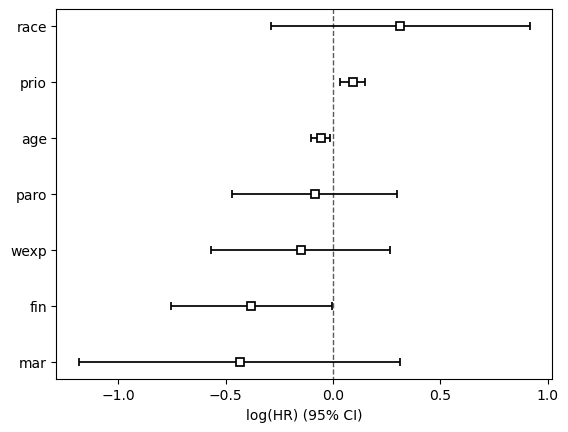

In [18]:
cph.plot()

<AxesSubplot:>

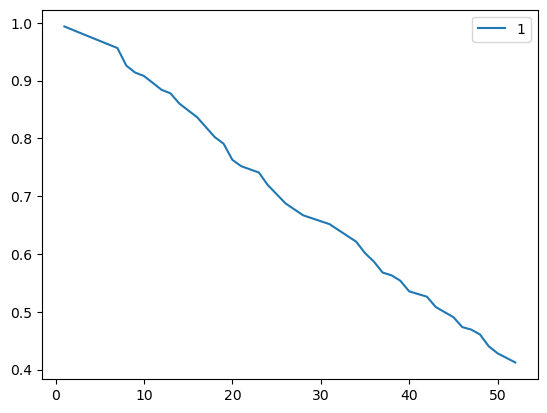

In [19]:
#Tomamos al indviduo 1
df_vector = rossi.iloc[1]
#funcion de supervivencia del individuo 1
cph.predict_survival_function(df_vector).plot()

<AxesSubplot:>

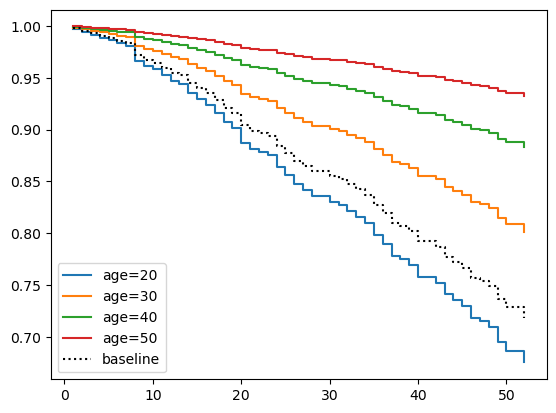

In [22]:
#Función de supervivencia por distinto grupo de edad
cph.plot_partial_effects_on_outcome(covariates='age', values=[20,30,40,50])
#Variable Aleatoria continua

<AxesSubplot:>

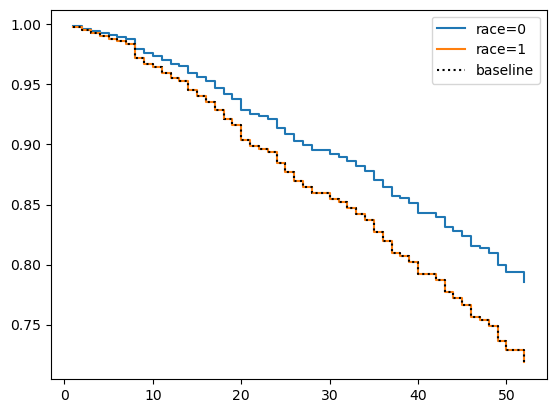

In [23]:
#Variable aleatoria discreta
cph.plot_partial_effects_on_outcome(covariates='race', values=[0,1])

In [25]:
from lifelines.datasets import load_kidney_transplant
transplante = load_kidney_transplant()
transplante.head()

,time,death,age,black_male,white_male,black_female
0,1,0,46,0,1,0
1,5,0,51,0,1,0
2,7,1,55,0,1,0
3,9,0,57,0,1,0
4,13,0,45,0,1,0


In [26]:
transplante.describe()

,time,death,age,black_male,white_male,black_female
count,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000
mean,1379.787949,0.162225,42.836616,0.106605,0.500579,0.068366
std,1009.908575,0.368871,13.515050,0.308789,0.500290,0.252520
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,426.000000,0.000000,33.000000,0.000000,0.000000,0.000000
50%,1269.000000,0.000000,43.000000,0.000000,1.000000,0.000000
75%,2216.000000,0.000000,54.000000,0.000000,1.000000,0.000000
max,3434.000000,1.000000,75.000000,1.000000,1.000000,1.000000


In [27]:
transplante.groupby('death').describe()

time                                                                 \
       count         mean          std  min    25%     50%      75%     max   
death                                                                         
0      723.0  1500.528354  1003.401362  1.0  580.5  1457.0  2331.00  3434.0   
1      140.0   756.250000   792.387714  2.0  102.5   444.5  1187.25  3146.0   

         age             ... white_male      black_female                      \
       count       mean  ...        75%  max        count      mean       std   
death                    ...                                                    
0      723.0  41.609959  ...        1.0  1.0        723.0  0.062241  0.241759   
1      140.0  49.171429  ...        1.0  1.0        140.0  0.100000  0.301077   

                                
       min  25%  50%  75%  max  
death                           
0      0.0  0.0  0.0  0.0  1.0  
1      0.0  0.0  0.0  0.0  1.0  

[2 rows x 40 columns]

In [33]:
cph2 = CoxPHFitter()
cph2.fit(transplante, duration_col='time',event_col='death',formula = 'age+black_male+black_female')
cph2.print_summary()

<lifelines.CoxPHFitter: fitted with 863 total observations, 723 right-censored observations>
             duration col = 'time'
                event col = 'death'
      baseline estimation = breslow
   number of observations = 863
number of events observed = 140
   partial log-likelihood = -849.82
         time fit was run = 2023-03-06 22:38:22 UTC

---
               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                            
age            0.05       1.05       0.01             0.04             0.07                 1.04                 1.07
black_female   0.39       1.48       0.28            -0.16             0.95                 0.85                 2.58
black_male    -0.10       0.91       0.28            -0.65             0.46                 0.52                 1.58

               cmp to     z      p   -log2(p)
covariate                                    
age              0.00  7.11 <0.005      39.67
black_female     0.00  1.38   0.17       2.57
black_male       0.00 -0.35   0.73       0.46
---
Concordance = 0.67
Partial AIC = 1705.64
log-likelihood ratio test = 58.70 on 3 df
-log2(p) of ll-ratio test = 39.70

Conforme el tiempo pasa, existe un aumento en la probabilidad de morir.
El 16% de las personas muere en promedio a la edad de 43 años por rechazar el transplante.